In [28]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem.Scaffolds import MurckoScaffold

In [29]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

In [30]:
def to_scaffold(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        backbone = MurckoScaffold.MakeScaffoldGeneric(scaffold)
        scaffold = MurckoScaffold.GetScaffoldForMol(backbone)
    except ValueError:
        return None
    return Chem.MolToSmiles(scaffold)

In [31]:
scaffolds = [to_scaffold(m) for m in drugs]

In [32]:
from collections import Counter

In [33]:
most_common = Counter(scaffolds).most_common(10)

In [34]:
most_common

[('C1CCCCC1', 1039),
 ('', 983),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 166),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106)]

In [35]:
scaff2drug = {}
for s,d in zip(scaffolds, drugs):
    if s in scaff2drug:
        scaff2drug[s].append(d)
    else:
        scaff2drug[s] = [d]

In [36]:
scaff2drug

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56490>,
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56730>,
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce567a0>,
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56570>,
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56880>],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56960>],
 'C1CCCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce569d0>,
  ...],
 None: [<rdkit.Chem.rdchem.Mol at 0x1c3fce56a40>,
 'C1CCC(CCC2CCC3CCCCC3C2)CC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56ab0>,
 'C1CCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3fce56b20>,
 'C1CCC2C(C1)CCC2C1CCCC1': [<rdkit.Chem.rdchem.Mol at 0x1c3

In [37]:
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [(Chem.MolFromSmiles(m['Smiles']), float(m["pChEMBL Value"]) if m["pChEMBL Value"] else -1.0) for m in reader]

In [38]:
mtor_ligands

[(<rdkit.Chem.rdchem.Mol at 0x1c3fc5b2030>, 7.35),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fc5c7140>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fc5c63b0>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fc5c5e00>, 6.14),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fc5c6030>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fce577d0>, 5.82),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf2b680>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf2b1b0>, 5.78),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf2aea0>, 7.52),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45a80>, 7.04),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45a10>, 7.3),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45850>, 5.83),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf458c0>, 7.67),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45af0>, 9.24),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf459a0>, 6.62),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45b60>, 6.67),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45c40>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45bd0>, -1.0),
 (<rdkit.Chem.rdchem.Mol at 0x1c3fcf45930>, 5.77),
 (<rdkit.Chem.rdchem.Mol at 0x1c

In [39]:
mtor_scaffolds = [to_scaffold(m) for m,v in mtor_ligands]

In [40]:
scaff2mtor = {}
for s,d in zip(mtor_scaffolds, mtor_ligands):
    if s in scaff2mtor:
        scaff2mtor[s].append(d)
    else:
        scaff2mtor[s] = [d]

In [41]:
len(scaff2mtor), len(mtor_ligands), Counter(mtor_scaffolds).most_common(10)

(648,
 4596,
 [('C1CCC(C2CCC3C(C2)CC(C2CCCCC2)CC3C2CCCCC2)CC1', 283),
  ('C1CCC(CCC2CCCCC2C2CCC(CC3CCCCC3)CC2)CC1', 263),
  ('C1CCC(CCC2CCCCC2C2CCCCC2)CC1', 190),
  ('C1CCC(C2CC3CCCC3C(C3CCCCC3)C2)CC1', 135),
  ('C1CCC(CC2CCCCC2C2CCCCC2)CC1', 133),
  ('C1CCC(CC2CCC(CC3CCCCC3)C(C3CCCCC3)C2)CC1', 127),
  ('C1CCC(C2CCC3CCCCC32)CC1', 86),
  ('C1CCC(CC2CC3CCCCC3C2C2CCCCC2)CC1', 71),
  ('C1CCC(CCCC2CCC(C3CCCC(C4CCCCC4)C3)CC2)CC1', 60),
  ('C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1', 59)])

In [42]:
def get_most_active_compound(mols):
    sort = sorted(mols, key=lambda x: x[1], reverse=True)
    return sort[0]

In [43]:
for s, mols in scaff2mtor.items():
    print(get_most_active_compound(mols))

(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFA5A80>, 9.4)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FC86FE60>, 7.82)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF2AEA0>, 7.52)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FC86FAE0>, 8.7)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFA7ED0>, 6.12)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFA40B0>, 9.54)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF45AF0>, 9.24)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFA45F0>, 7.18)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF46A40>, 6.06)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF45BD0>, -1.0)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF45930>, 5.77)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCF45CB0>, -1.0)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFCA420>, 8.52)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFC78B0>, 5.52)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCE54890>, 10.0)
(<rdkit.Chem.rdchem.Mol object at 0x000001C3FCFAC660>, 8.7)
(<rdkit.Chem.rdchem.Mol obj

In [44]:
s = Chem.MolFromSmiles('C1CCC(C2C(CC3CCCC3)CC3CCC(C4CCC(C5CC5)C4)CC32)CC1')
mol = scaff2mtor['C1CCC(C2C(CC3CCCC3)CC3CCC(C4CCC(C5CC5)C4)CC32)CC1'][0][0]

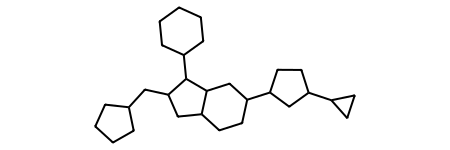

In [45]:
s

In [46]:
mol.GetSubstructMatch(MurckoScaffold.GetScaffoldForMol(mol))

(1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30)

In [47]:
[(a.GetIdx(), a.GetSymbol()) for a in mol.GetAtoms()]

[(0, 'C'),
 (1, 'C'),
 (2, 'N'),
 (3, 'C'),
 (4, 'N'),
 (5, 'N'),
 (6, 'C'),
 (7, 'C'),
 (8, 'C'),
 (9, 'N'),
 (10, 'C'),
 (11, 'C'),
 (12, 'C'),
 (13, 'N'),
 (14, 'N'),
 (15, 'N'),
 (16, 'C'),
 (17, 'C'),
 (18, 'C'),
 (19, 'C'),
 (20, 'C'),
 (21, 'C'),
 (22, 'N'),
 (23, 'N'),
 (24, 'C'),
 (25, 'C'),
 (26, 'C'),
 (27, 'C'),
 (28, 'C'),
 (29, 'N'),
 (30, 'N')]

In [48]:
[(a.GetIdx(), a.GetSymbol()) for a in MurckoScaffold.GetScaffoldForMol(mol).GetAtoms()]

[(0, 'C'),
 (1, 'N'),
 (2, 'C'),
 (3, 'N'),
 (4, 'C'),
 (5, 'C'),
 (6, 'C'),
 (7, 'N'),
 (8, 'C'),
 (9, 'C'),
 (10, 'C'),
 (11, 'N'),
 (12, 'N'),
 (13, 'N'),
 (14, 'C'),
 (15, 'C'),
 (16, 'C'),
 (17, 'C'),
 (18, 'C'),
 (19, 'C'),
 (20, 'N'),
 (21, 'N'),
 (22, 'C'),
 (23, 'C'),
 (24, 'C'),
 (25, 'C'),
 (26, 'C'),
 (27, 'N'),
 (28, 'N')]

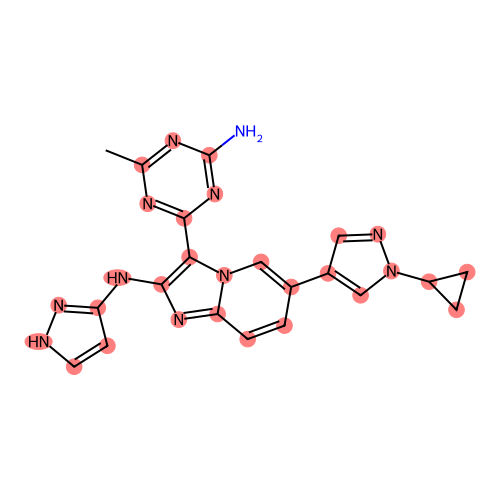

In [49]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=mol.GetSubstructMatch(MurckoScaffold.GetScaffoldForMol(mol)))
d.FinishDrawing()
SVG(d.GetDrawingText())

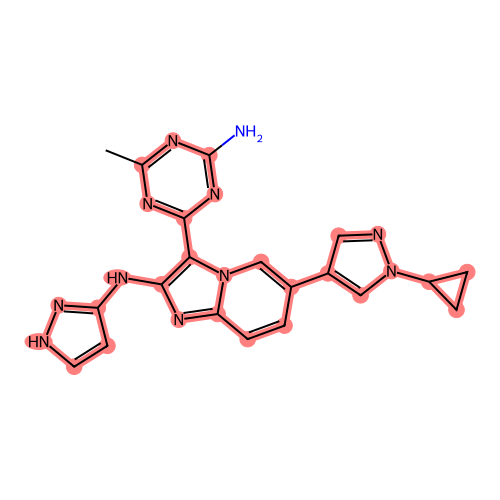

In [50]:
d = Draw.MolDraw2DSVG(500, 500)
d.DrawMolecule(mol, highlightAtoms=mol.GetSubstructMatch(MurckoScaffold.GetScaffoldForMol(mol)))
d.FinishDrawing()
SVG(d.GetDrawingText())